#### TRABALHO FINAL MEAD - QUESTÃO 3

Nome: MAYTA SOARES CUSTODIO\
Matrícula: 192.671.147\
Turma: 2019.2

Questão 3

Base de dados de restaurantes de NY (ny_restaurant.csv).\
Essa base tem o resultado de uma pesquisa de avaliação de 168
restaurantes na cidade de Nova Iorque e consiste de alguns atributos:
● Id: identificador do restaurante
● Restaurant: nome do restaurante sendo avaliado
● Price: Preço médio de um jantar no restaurante
● Food: Nota média de 1 a 30 dos avaliadores para a qualidade da comida
● Decor: Nota média de 1 a 30 dos avaliadores para a decoração do restaurante
● Service: Nota média de 1 a 30 dos avaliadores para o serviço do restaurante
● Location: Variável categórica indicando a localização do restaurante.

Criar modelos de regressão múltipla


##### AS QUESTÕES SERÃO RESPONDIDAS NA SEQUÊNCIA DA LETRA 'a' A 'e'. TODOS OS PASSOS FORAM COMENTADOS.

a) Realizar uma análise descritiva dos dados plotando alguns gráficos e analisando algumas estatísticas básicas. (1 ponto)
b) Construir um modelo utilizando todas as variáveis do dataset. Após o ajuste do modelo
será necessário interpretar cada coeficiente no impacto da variável resposta, dizendo a
relação com a variável resposta e se são significantes ou não. O modelo no geral é
significante? Como podemos afirmar isso? Interprete o coeficiente de determinação ou o
desvio (dependendo do modelo escolhido)? Para o dataset de restaurantes, queremos
prever o preço do jantar de acordo com as outras variáveis. (2 pontos)\
c) Investigar se as premissas do modelo foram violadas. (1 ponto)\
d) Construir mais dois modelos diferentes do modelo saturado construído acima, justificando
a escolha das variáveis. Não deixe de analisar se as premissas estão sendo violadas. (2
pontos)\
e) Qual o melhor modelo? Comparar os modelos construídos com pelo menos três métricas,
justificando a escolha do melhor modelo. (1 ponto)

#### a) Realizar uma análise descritiva dos dados plotando alguns gráficos e analisando algumas estatísticas básicas. (1 ponto)

In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm

import matplotlib.pyplot as plt
import seaborn as sns

import graphs

#USADO MÓDULO GRAPHS.PY E MODEL_SELECTION.PY FORNECIDOS EM AULA

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]

Carregando o dataset 'Ny Restaurantes' e verificando suas informações




In [ ]:
data = pd.read_csv('./ny_restaurantes.csv', sep = " ", index_col=1)
data


,Restaurant,Price,Food,Decor,Service,Location
Daniella Ristorante,1,43,22,18,20,West
Tello's Ristorante,2,32,20,19,19,West
Biricchino,3,34,21,13,18,West
Bottino,4,41,20,20,17,West
Da Umberto,5,54,24,19,21,West
...,...,...,...,...,...,...
Baci,164,31,17,15,16,West
Puccini,165,26,20,16,17,West
Bella Luna,166,31,18,16,17,West
Métisse,167,38,22,17,21,West


In [ ]:
data.tail()

,Restaurant,Price,Food,Decor,Service,Location
Baci,164,31,17,15,16,West
Puccini,165,26,20,16,17,West
Bella Luna,166,31,18,16,17,West
Métisse,167,38,22,17,21,West
Gennaro,168,34,24,10,16,West


In [ ]:
data.shape

(168, 6)

In [ ]:
# NÃO TEMOS MISSINGS E PODEMOS VERIFICAR QUE LOCATION É UM ATRIBUTO NECESSÁRIO. IREMOS TRANSFORMAR ESSA COLUNA

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, Daniella Ristorante to Gennaro
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  168 non-null    int64 
 1   Price       168 non-null    int64 
 2   Food        168 non-null    int64 
 3   Decor       168 non-null    int64 
 4   Service     168 non-null    int64 
 5   Location    168 non-null    object
dtypes: int64(5), object(1)
memory usage: 9.2+ KB


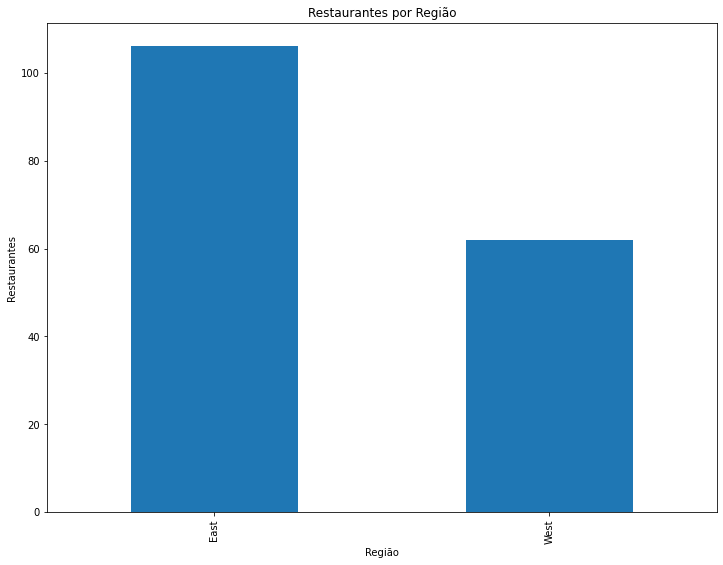

In [ ]:
# PLOTANDO GRÁFICO DE ACORDO COM A LOCALIZAÇÃO

plt.figure(figsize=(12, 9))
Localização= data['Location'].value_counts()
Localização.plot(kind='bar')
plt.xlabel('Região')
plt.ylabel('Restaurantes')
plt.title('Restaurantes por Região')
plt.show()

In [ ]:
# ADICIONAMOS O ATRIBUTO LOCATIZAÇÃO PARA QUE POSSAMOS USAR TODAS AS COLUNAS DO DATAFRAME - FATOR DUMMY

pd.get_dummies(data['Location'], prefix='Location')

,Location_East,Location_West
Daniella Ristorante,0,1
Tello's Ristorante,0,1
Biricchino,0,1
Bottino,0,1
Da Umberto,0,1
...,...,...
Baci,0,1
Puccini,0,1
Bella Luna,0,1
Métisse,0,1


In [ ]:
# RETIRAMOS UMA DAS COLUNAS, POIS SÓ TEMOS DUAS LOCALIZAÇÕES E UMA JUSTIFICA A OUTRA
# 1 - WEST E  0 - East

dummy_location = pd.get_dummies(data['Location'], prefix='Location', drop_first=True)
dummy_location.head()

,Location_West
Daniella Ristorante,1
Tello's Ristorante,1
Biricchino,1
Bottino,1
Da Umberto,1


In [ ]:
# CONCATENANDO OS DATAFRAMES PARA INCLUIR A VARIÁVEL DUMMY DA LOCALIZAÇÃO
# FILTREI E RETIREI A COLUNA RESTAURANTE TAMBÉM PARA NÃO ATRAPALHAR NO DESENVOLVIMENTO

columns_to_keep = ['Price', 'Food', 'Decor', 'Service']
data1 = data[columns_to_keep].join(dummy_location)
data1.head()

,Price,Food,Decor,Service,Location_West
Daniella Ristorante,43,22,18,20,1
Tello's Ristorante,32,20,19,19,1
Biricchino,34,21,13,18,1
Bottino,41,20,20,17,1
Da Umberto,54,24,19,21,1


In [ ]:
# RENOMEANDO A COLUNA LOCATION: PARA WEST SERÁ = 1 E PARA EAST = 0

data1.rename(columns={'Location_West': 'Location'}, inplace=True)

In [ ]:
data1

,Price,Food,Decor,Service,Location
Daniella Ristorante,43,22,18,20,1
Tello's Ristorante,32,20,19,19,1
Biricchino,34,21,13,18,1
Bottino,41,20,20,17,1
Da Umberto,54,24,19,21,1
...,...,...,...,...,...
Baci,31,17,15,16,1
Puccini,26,20,16,17,1
Bella Luna,31,18,16,17,1
Métisse,38,22,17,21,1


In [ ]:
# Verificamos as médias, mínimo, máximo e outras estatísticas da classificação dos restaurantes
# E podemos também verificar as questões dos preços: média 42,70. valor mínimo de 19,00 e máximo de 65,00
# 37% aproximadamente dos restaurantes se localizam no West = 1 (32), e a maioria 63%, no East = 0 (106)

data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,168.0,42.696429,9.292814,19.0,36.0,43.0,50.0,65.0
Food,168.0,20.595238,1.982674,16.0,19.0,20.5,22.0,25.0
Decor,168.0,17.690476,2.702743,6.0,16.0,18.0,19.0,25.0
Service,168.0,19.398810,2.113940,14.0,18.0,20.0,21.0,24.0
Location,168.0,0.369048,0.483989,0.0,0.0,0.0,1.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29ec625eb8>,
      dtype=object)

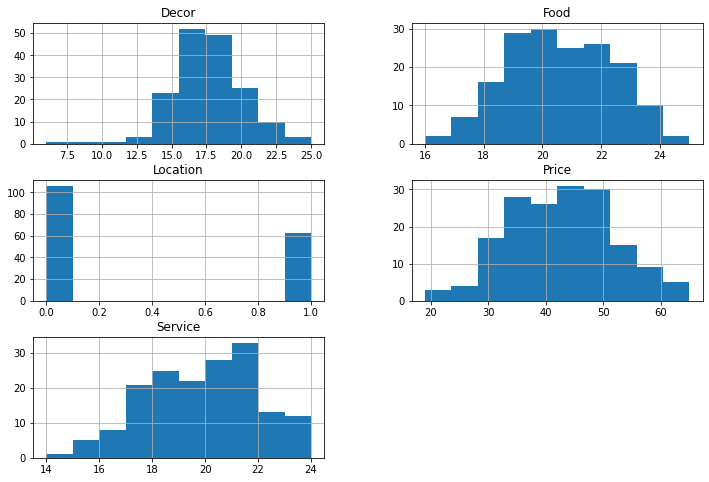

In [ ]:
# Histograma das variáveis como uma forma de exploração dos dados

# As notas referentes a decoração são mais altas, acima da média
# Notas em relação a comida estão mais concentradas entre 19 e 22/23
# Os valores édios dos pratos concentrados majoritariamente entre 31/32,00 e 50,00
# As notas referentes ao serviço também estão em média mais altas, acima da média
# E como havíamos visto, a maior parte dos restaurantes se concentra no East = 0


data1.hist()

In [ ]:
# Verificando a correlação entre os atributos

data1.corr()

,Price,Food,Decor,Service,Location
Price,1.000000,0.627043,0.724352,0.641140,-0.186630
Food,0.627043,1.000000,0.503916,0.794525,-0.180371
Decor,0.724352,0.503916,1.000000,0.645331,-0.035749
Service,0.641140,0.794525,0.645331,1.000000,-0.209094
Location,-0.186630,-0.180371,-0.035749,-0.209094,1.000000


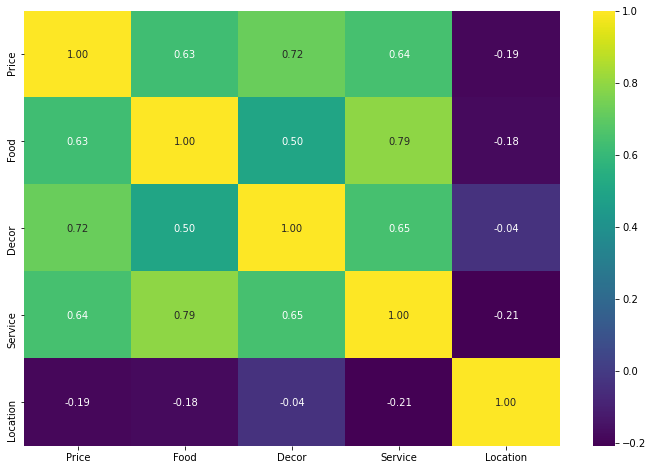

In [ ]:
# ANALISANDO O HEATMAP ABAIXO, VERIFICAMOS QUE AS OORRELAÇÕES SÃO COESAS:

# MAIORES TAXAS DE CORRELAÇÃO SÃO ENTRE:
# COMIDA E SERVIÇO  - 0.79;  DECORAÇÃO E PREÇO - 0.72; 
# INTERMEDIÁRIAS: DECORAÇÃO E SERVIÇO: 0.65;  PREÇO E SERVIÇO - 0.64; PREÇO E COMIDA - 0,63;
# MENORES TAXAS DE CORRELAÇÃO ENTRE: COMIDA E DECORAÇÃO - 0.5; 

sns.heatmap(data1.corr(), annot=True, cmap="viridis", fmt="0.2f");

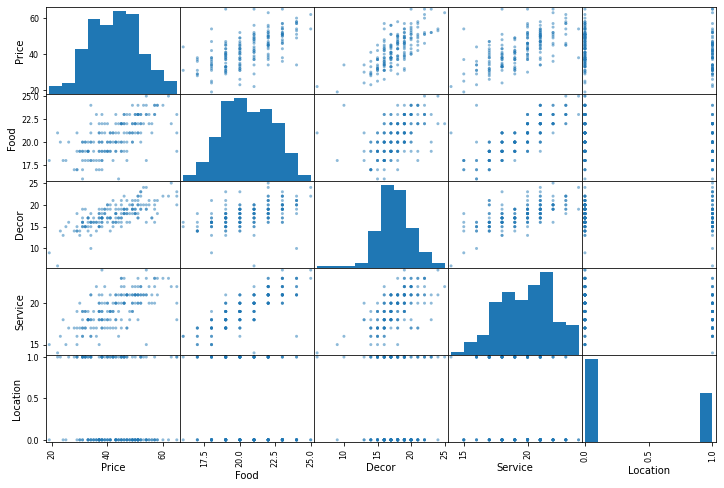

In [ ]:
# GRÁFICO DE DISPERSÃO PARA CADA PAR DE ATRIBUTOS

pd.plotting.scatter_matrix(data1);

In [ ]:
# Consultando quantos restaurantes possuem a mesma média de preço

data1_price = data['Price'].value_counts()
data1_price

38    10
37     9
51     8
45     8
43     8
46     7
31     7
49     7
34     7
47     6
50     6
52     6
33     6
41     6
40     6
54     5
44     4
42     4
57     4
32     4
29     4
39     4
36     3
35     3
65     3
48     3
53     2
55     2
56     2
58     2
30     2
63     1
60     1
62     1
28     1
26     1
25     1
24     1
23     1
22     1
19     1
Name: Price, dtype: int64

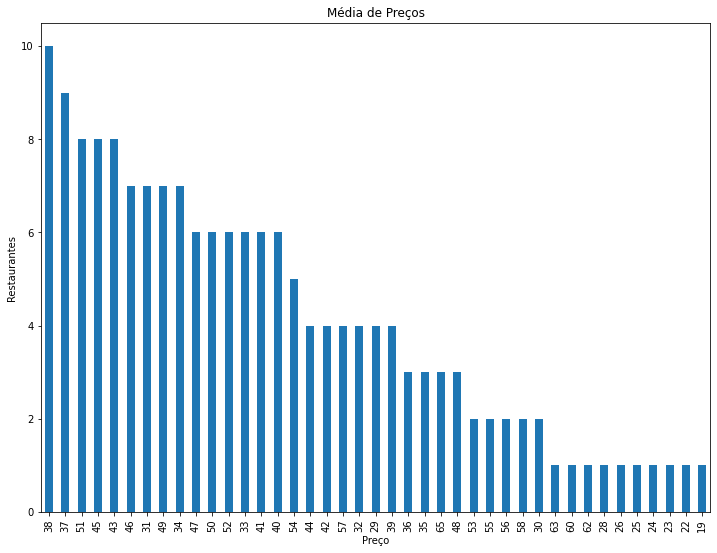

In [ ]:
# Plotando gráfico em relação à média dos preços

plt.figure(figsize=(12, 9))
data_price = data1['Price'].value_counts()
data_price.plot(kind='bar')
plt.xlabel('Preço')
plt.ylabel('Restaurantes')
plt.title('Média de Preços')
plt.show()

#### AS RESPOSTAS DA LETRA 'b' SERÃO FORNECIDAS AO LONGO DO DESENVOLVIMENTO COM COMENTÁRIOS NAS LINHAS DE CÓDIGOS, COM UM RESUMO ESCRITO NO FINAL.

#### b) Construir um modelo utilizando todas as variáveis do dataset. Após o ajuste do modelo será necessário interpretar cada coeficiente no impacto da variável resposta, dizendo a relação com a variável resposta e se são significantes ou não. O modelo no geral é significante? Como podemos afirmar isso? Interprete o coeficiente de determinação ou o desvio (dependendo do modelo escolhido)? Para o dataset de restaurantes, queremos prever o preço do jantar de acordo com as outras variáveis. (2 pontos)

In [ ]:
# CRIANDO UM MODELO COM TODAS AS VARIÁVEIS
# X = VARIÁVEIS PREDITORAS E Y = VARIÁVEL RESPOSTA

X = sm.add_constant(data1.drop(['Price'],axis=1))
y = data1['Price']
X.head()

,const,Food,Decor,Service,Location
Daniella Ristorante,1.0,22,18,20,1
Tello's Ristorante,1.0,20,19,19,1
Biricchino,1.0,21,13,18,1
Bottino,1.0,20,20,17,1
Da Umberto,1.0,24,19,21,1


In [ ]:
model = sm.OLS(y, X).fit()

#model = sm.OLS(y.astype(float), X.astype(float)).fit()

In [ ]:
print(model.summary())

# VERIFICAMOS QUE:
# COEFICIENTE DE DETERMINAÇÃO 62,8%
# COEFICIENTE DE DETERMINAÇÃO AJUSTADO: 61,9% 
# ESTATÍSTICA F DE 68.76
# MODELO RELEVANTE
# P-VALOR INDICA QUE PELO MENOS UM DOS COEFICIENTES SÃO SIGNIFICATIVOS
# SERVICE POSSUI UM P-VALOR ACIMA DE 0.05 (VALOR MAIOR QUE O LIMITE SIGNIFICA QUE É IGUAL A ZERO), VAMOS ANALISAR MAIS A FUNDO


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     68.76
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           5.35e-34
Time:                        22:07:11   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1069.
Df Residuals:                     163   BIC:                             1084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.9557      4.858     -4.520      0.0

#### VERIFICANDO AS PREMISSAS

In [ ]:
graph_plotter = graphs.AssumptionGraphs(model)

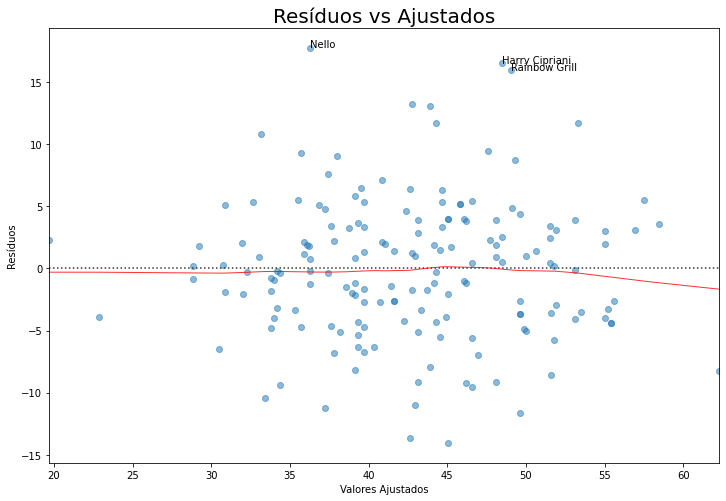

In [ ]:
# GRÁFICO DOS RESÍDUOS X VALOR AJUSTADO - NÃO FERE A PREMISSA

graph_plotter.plot_residual_fitted_values(y)

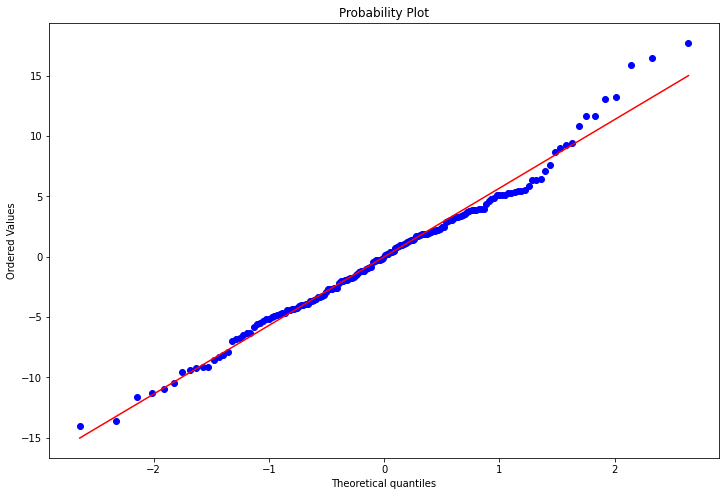

In [ ]:
# TESTANDO A NORMALIDADE 

graph_plotter.plot_qq()

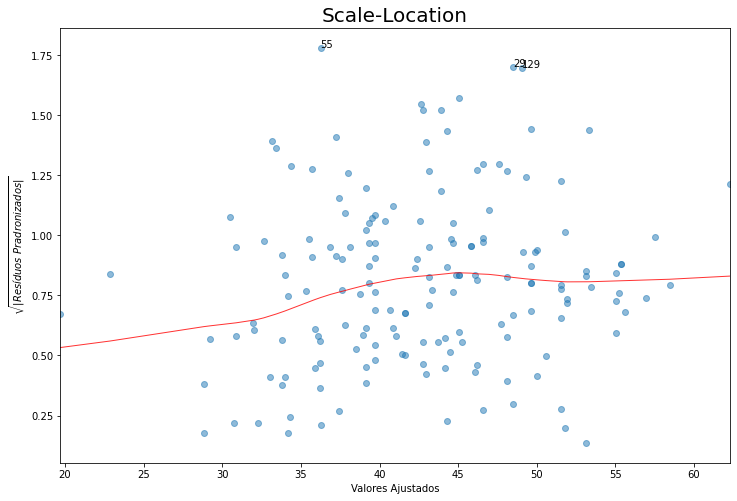

In [ ]:
# GRÁFICO SCALE LOCATION - VERIFICA-SE UMA TENDÊNCIA DE SUBIDA DOS VALORES AJUSTADOS COM OS RESIDUOS PADRONIZADOS

graph_plotter.plot_scale_location()

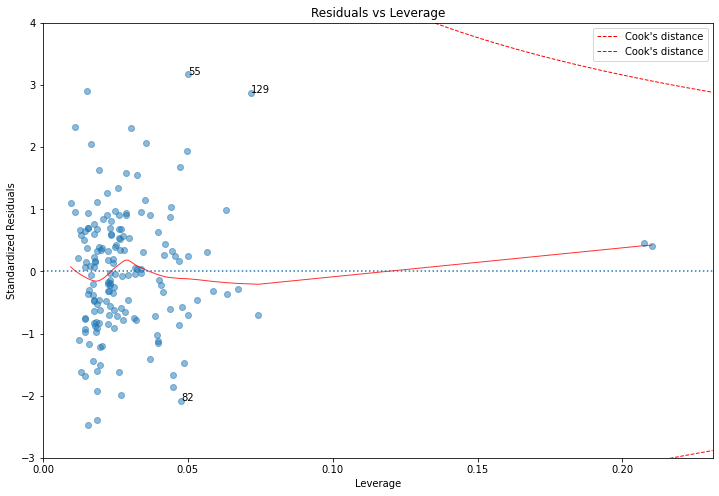

In [ ]:
# COM O GRÁFICO DE INFLUÊNCIA VERIFICAMOS QUE TEMOS PONTOS DE INFLUENCIAM BASTANTE NOS COEFICIENTE DE REGRESSÃO, PORÉM COM ERROS BAIXOS

graph_plotter.plot_influence()

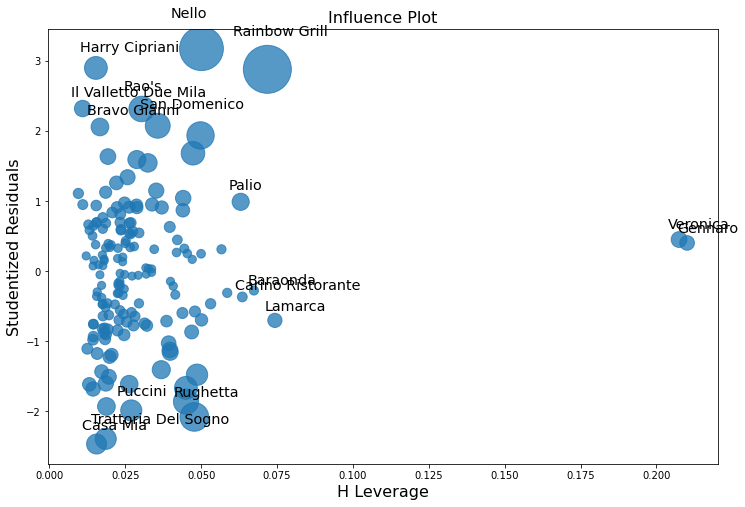

In [ ]:
# OUTRO GRÁFICO DE INFLUÊNCIA PARA UMA VERIFICAÇÃO MAIS COMPLETA 

model.get_influence().plot_influence();

 #### Fator de inflação da variância

In [ ]:
# PREMISSA DE MULTICOLINEARIDADE

# VERIFICAMOS SE ALGUM PASSA DE 5. O SERVIÇO ESTÁ UM POUCO ALTO ENTÃO, VAMOS CONFIRMAR NO GRÁFICO DE REGRESSÃO PARCIAL QUE DEVERÁ SER REMOVIDO.

pd.Series([variance_inflation_factor(X.values, i) 
           for i in range(X.shape[1])], 
           index=X.columns)

const       120.424142
Food          2.714261
Decor         1.744851
Service       3.558735
Location      1.064985
dtype: float64

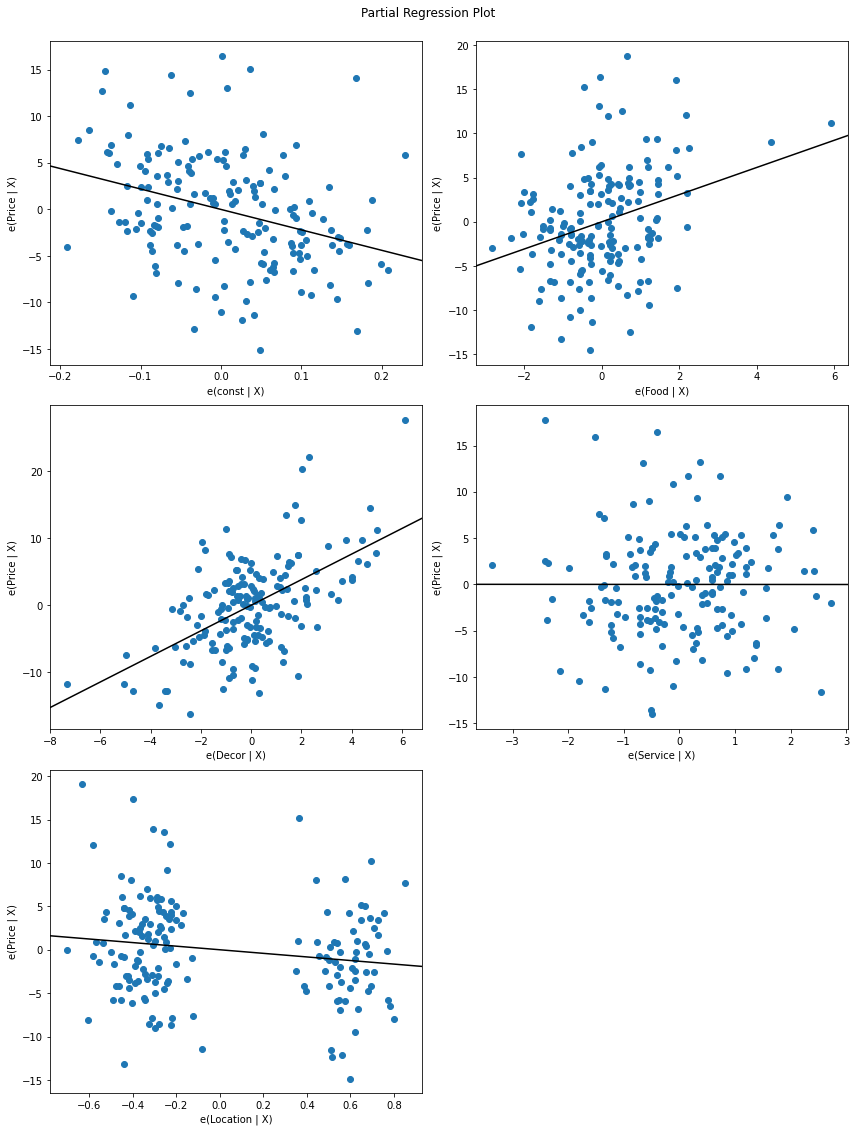

In [ ]:
# Gráfico de regressão parcial ou de variável agregada

fig = plt.figure(figsize=(12, 16))
sm.graphics.plot_partregress_grid(model, fig=fig);


Padrões distintos são indicadores de boas contribuições para o modelo. Enquanto que a falta de padrões geralmente apontam para variaveis que podem ser removidas do modelo.

Como a variável `Serviço` tem uma linha praticamente horizontal, ela não agrega nada para o modelo.  alto fator de inflação de variância, um p-valor de 0.995, bem maior que 0.5 e não tem um padrão distinto nos gráficos de regressão parcial. Vamos remover essa variável para um novo teste.

In [ ]:
X = sm.add_constant(data1.drop(['Price', 'Service'], axis=1))
y = data1['Price']
X.head()

,const,Food,Decor,Location
Daniella Ristorante,1.0,22,18,1
Tello's Ristorante,1.0,20,19,1
Biricchino,1.0,21,13,1
Bottino,1.0,20,20,1
Da Umberto,1.0,24,19,1


In [ ]:
model2 = sm.OLS(y, X).fit()

In [ ]:
print(model2.summary())


# ANALIZANDO O NOVO RESULTADO:

# COEFICIENTE DE DETERMINAÇÃO AJUSTADO AUMENTOU UM POUCO PARA 62.1 (ANTES = 61,9%)
# ESTATÍSTICA F AUMENTOU PARA 92.24 (ANTES = 68,76)
# MODELO CONTINUA SENDO SIGNIFICANTE - TESTE F GLOBAL
# P-VALORES MOSTRAM QUE NENHUM É MAIOR QUE 0.05

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     92.24
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           5.10e-35
Time:                        22:07:50   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1067.
Df Residuals:                     164   BIC:                             1079.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.9599      4.806     -4.569      0.0

#### VERIFICANDO AS PREMISSAS

In [ ]:
graph_plotter = graphs.AssumptionGraphs(model2)

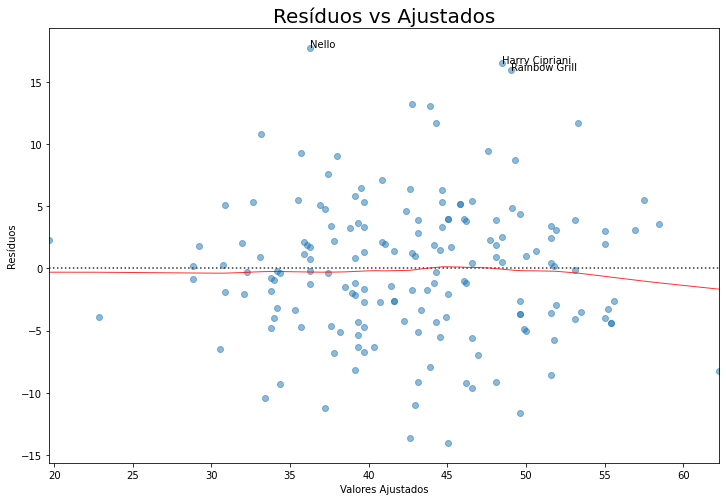

In [ ]:
# O NOVO GRÁFICO DOS RESÍDUOS X VALOR AJUSTADO, ESTÁ LIGEIRAMENTE MELHOR 
# NÃO FERE A PREMISSA

graph_plotter.plot_residual_fitted_values(y)

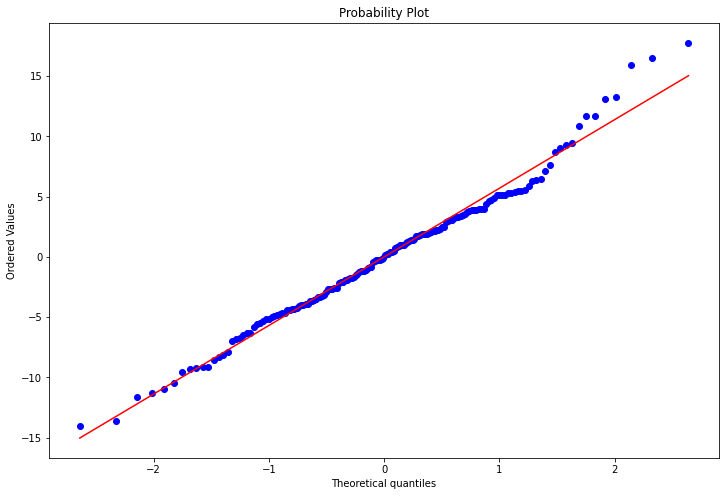

In [ ]:
# TESTANDO A NORMALIDADE - NÃO FERE A PREMISSÃO DA NORMALIDADE

graph_plotter.plot_qq()

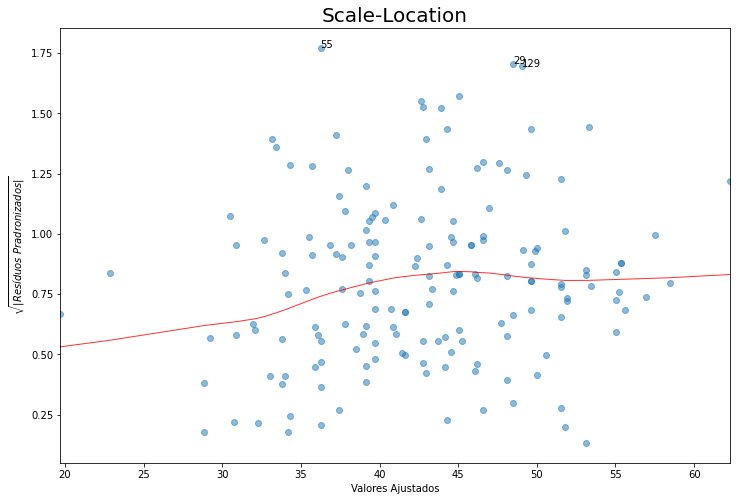

In [ ]:
# GRÁFICO SCALE LOCATION - VERIFICA-SE UMA TENDÊNCIA DE SUBIDA MAIOR QUE A ANTERIOR


graph_plotter.plot_scale_location()

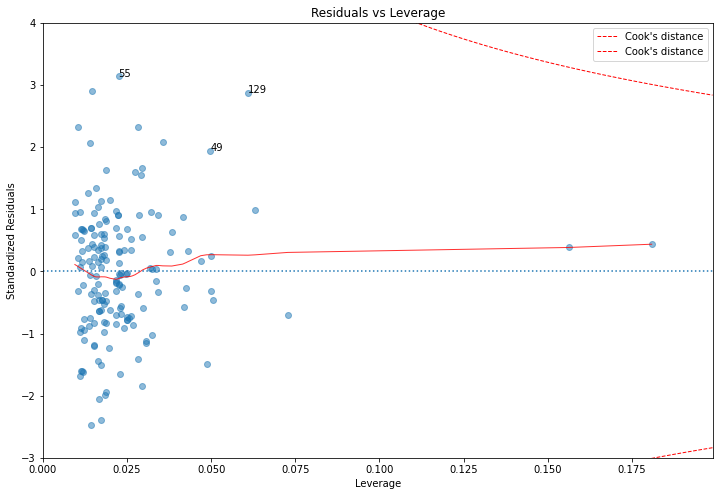

In [ ]:
# GRÁFICO DE INFLUÊNCIA 

graph_plotter.plot_influence()

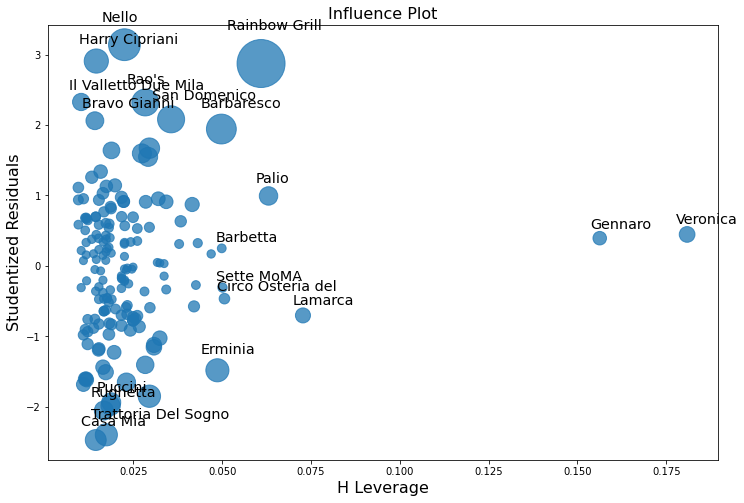

In [ ]:
# OS RESTAURANTES 'GENNARO' E 'VERONICA' ESTÃO LIGERIAMENTE MAIS PRÓXIMOS DOS DEMAIS

model2.get_influence().plot_influence();

#### Fator de influência da variância

In [ ]:
# PREMISSA DE MULTICOLINEARIDADE - NÃO FERIU A PREMISSA
# NENHUM FATOR ACIMA DE 5

pd.Series([variance_inflation_factor(X.values, i) 
           for i in range(X.shape[1])], 
           index=X.columns)

const       118.598500
Food          1.389515
Decor         1.346030
Location      1.038000
dtype: float64

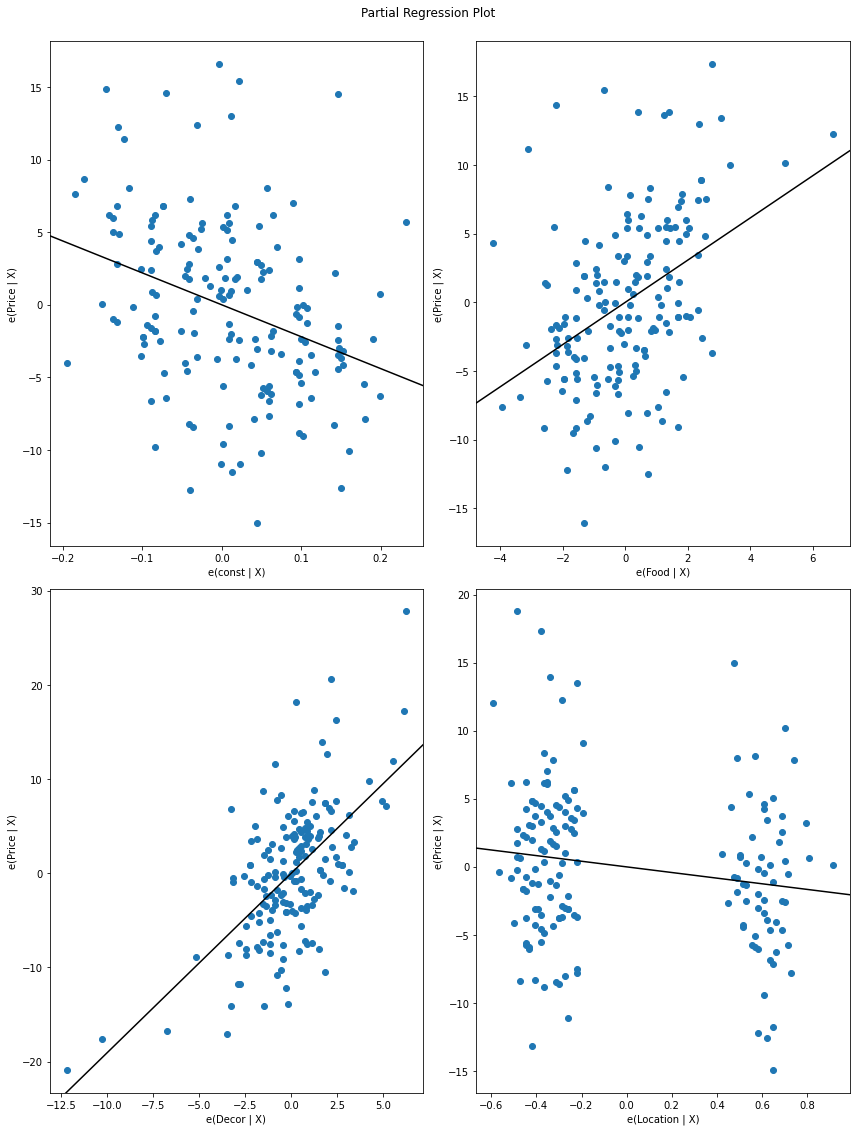

In [ ]:
# GRÁFICO DE REGRESSÃO PARCIAL, NÃO TEM NENHUMA LINHA HORIZONTAL, ENTÃO TODAS CONTRIBUEM PARA O MODELO 

fig = plt.figure(figsize=(12, 16))
sm.graphics.plot_partregress_grid(model_reduced, fig=fig);

Podemos comparar os dois modelos usando o F-test parcial usando a função anova

In [ ]:
anova_results = anova_lm(model2, model)
anova_results

# COMPARANDO OS DOIS MODELOS:

# O p-valor é bem alto, indicando que devemos ficar com a hipótese nula e concluímos que a variável Service não é informativa para o modelo.

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,164.0,5366.523275,0.0,NaN,NaN,NaN
1,163.0,5366.521715,1.0,0.00156,0.000047,0.994516


Usando o teste F parcial para testar múltiplas variáveis preditoras de uma vez. Comparando com o modelo completo e outro, sem as variáveis 'Serviço' e 'Localização`, que teve um p-valor diferente dos demais, porém ainda abaixo de 0.05. Apenas para testar o modelo e seu efeito no preço. 

In [ ]:
# MODELO COMPLETO

X = sm.add_constant(data1.drop(['Price'], axis=1))
y = data1['Price']
model_full = sm.OLS(y, X).fit()

In [ ]:
# MODELO REDUZIDO SEM A VARIÁVEL SERVIÇO

X = sm.add_constant(data1.drop(['Price','Service'], axis=1))
y = data1['Price']
model_reduced = sm.OLS(y, X).fit()

In [ ]:
anova_results = anova_lm(model_reduced, model_full)
anova_results

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,164.0,5366.523275,0.0,NaN,NaN,NaN
1,163.0,5366.521715,1.0,0.00156,0.000047,0.994516


#### O p-valor aumentou muito, então o modelo reduzido é suficiente para explicar a variável resposta se comparado ao modelo full. Premissas acima realizadas e validadas como MODEL2

#### Métricas AIC e BIC

In [ ]:
# OBTENDO O MENOR VALOR DAS MÉTRICAS AIC E BIC, VEMOS QUE O MODELO REDUZIDO É O MELHOR MODELO

pd.DataFrame({'Model': ['Full', 'Reduced'], 'AIC': [model_full.aic, model_reduced.aic],
              'BIC': [model_full.bic, model_reduced.bic]})

,Model,AIC,BIC
0,Full,1068.710521,1084.330341
1,Reduced,1066.710570,1079.206426


MÉTODOS DE SELEÇÃO DE MODELOS - CRIAÇÃO DE MODELO PARA ANALISAR AS MÉTRICAS

In [ ]:
# UTILIZADO O SCRIPT model_selection.py fornecido em aula

from model_selection import forward_selected, backward_selected

In [ ]:
data.columns

Index(['Restaurant', 'Price', 'Food', 'Decor', 'Service', 'Location'], dtype='object')

In [ ]:
# COLUNAS USADAS DE FATO NO MODELO FINAL DO DATAFRAME

best_model_forward = forward_selected(data, 'Price')

Adding Decor	score: 0.5218231829126965
Adding Food	score: 0.6120697668072232
Adding Location	score: 0.6210737705927636


In [ ]:
# COLUNAS RETIRADAS DO DATAFRAME NO MODELO FINAL

best_model_backward = backward_selected(data, 'Price')

Removing Service	score: 0.6194609670424469
Removing Restaurant	score: 0.6210737705927636


In [ ]:
# MESMA APRESENTAÇÃO DO MODEL2 - REDUCED

print(best_model_forward.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     92.24
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           5.10e-35
Time:                        22:08:51   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1067.
Df Residuals:                     164   BIC:                             1079.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -21.9599      4.806  

In [ ]:
# O erro residual padrão é 5.72. 
#Esse valor é uma aproximação de quanto os resíduos tendem a desviar da linha da regressão

np.sqrt(model2.scale)

5.720376115066385

#### Interpretar cada coeficiente no impacto da variável resposta, dizendo a relação com a variável resposta e se são significantes ou não

##### RESPOSTA

PODEMOS VERIFICAR QUE OS COEFICIENTES UTILIZADOS NO MODELO FINAL SÃO SIGNIFICATIVOS, PORQUE O P-VALOR DELES É MENOR QUE 0.05.
LOCALIZAÇÃO: 0.028
DECORAÇÃO: 0.000
COMIDA: 0.000


A LOCALIZAÇÃO E A COMIDA SÃO FATORES DE ALTO IMPACTO EM RELAÇÃO A VARIÁVEL RESPOSTA PREÇO. A COMBINAÇÃO DE DECORAÇÃO, LOCALIZAÇÃO ESTÁ LIGADA DIRETAMENTE AO PREÇO, O QUE FAZ ESSES COEFICIENTES COESOS, POIS QUANTO MELHOR LOCALIZADO E UM AMBIENTE MAIS REQUINTADO, A FAIXA DE PREÇOS AUTOMATICAMENTE ACOMPANHA. O QUE FAZ DOS TRÊS COEFICIENTES SIGNIFICANTES.
O COEFICIENTE SERVIÇO ESTÁ MENOS RELACIONADO AO PREÇO, FOI INCLUSIVE RETIRADO DO MODELO FINAL POIS NÃO É SIGNIFICANTE.



#### O modelo no geral é significante? Como podemos afirmar isso? 

#### RESPOSTA 

O MODELO É SIGNIFICANTE. PODEMOS AFIMAR ATRAVÉS DO TESTE F GLOBAL DE 5.10e-35 (Prob F-statistic) A ESTATÍSTICA F PARA A REGRESSÃO TAMBÉM É SIGNIFICATIVA, POIS O P-VALOR DE F (Prob (F-statistic) É 5.10e-35, TAMBÉM MENOR QUE 0.05.




Interprete o coeficiente de determinação ou o desvio? 

#### RESPOSTA

#### $R^2$ (coeficiente de determinação) É LIMITADO ENTRE 0 E 1. O R² DO NOSSO MODELO 2(REDUZIDO) ESTÁ EM 0.628, OU SEJA, 62,8%, E O AJUSTADO EM 62,1%. O QUE INDICA UM VALOR MAIS ALTO, OU SEJA, UM MELHOR MODELO E UMA MAIOR PORCENTAGEM DA VARIABILIDADE DA VARIÁVEL DEPENDETE QUE FOI EXPLICADA PELO MODELO. INTERVALO DE CONFIANÇA DE 95% 



O erro residual padrão é 3.80. Esse valor é uma aproximação de quanto os resíduos tendem a desviar da linha da regressão

c) Investigar se as premissas do modelo foram violadas. 

#### RESPOSTA

AS PREMISSAS DO MELHOR MODELO (2 - REDUZIDO), FORAM APONTADAS NOS GRÁFICOS ACIMA E COMENTADOS:
GRÁFICO DOS RESÍDUOS X VALOR AJUSTADO, NORMALIDADE, GRÁFICO SCALE LOCATION E INFLUENCE. FATOR DE INFLUÊNCIA DA VARIÃNCIA , GRÁFICO DE REGRESSÃO PARCIAL, PREMISSA DE MULTICOLINEARIDADE.

d) Construir mais dois modelos diferentes do modelo saturado construído acima, justificando a escolha das variáveis. Não deixe de analisar se as premissas estão sendo violadas. (2 pontos)

In [ ]:
#Verificando a classificação dos restaurantes em relação ao somatório de nota de acordo com a Comida, Decoração e Serviço

data_melhor_score = data1['Food'] + data1['Decor'] + data1['Service']
data_melhor_score.sort_values(ascending=False)


Erminia                73
FELIDIA                70
Primavera              69
Palio                  69
DeGrezia               68
                       ..
Mangia e Bevi          47
Ernie's                47
Zucchero e Pomodori    46
Lamarca                42
Veronica               41
Length: 168, dtype: int64

In [ ]:
# Consultando o restaurante Erminia, mais pontuado: 73 (Comida, Decoração e Serviço)
# A LOCALIZAÇÃO 0 = EAST É MAIS CARA QUE A WEST, POIS NA EAST ESTÁ O RESTAURANTE MELHOR PONTUADO

data1.loc['Erminia']

Price       54
Food        25
Decor       24
Service     24
Location     0
Name: Erminia, dtype: int64

In [ ]:
# Consultando o restaurante Erminia, memos pontuado: 41 (Comida, Decoração e Serviço)
# A LOCALIZAÇÃO 1 = WEST É MAIS BARATA QUE A EAST, POIS NA EAST ESTÁ O RESTAURANTE MENOS PONTUADO

data1.loc['Veronica']

Price       22
Food        21
Decor        6
Service     14
Location     1
Name: Veronica, dtype: int64

In [ ]:
# Inserindo esse somatório em uma nova coluna do dataframe

data1['Score'] = data1['Food'] + data1['Decor'] + data1['Service']
data1

,Price,Food,Decor,Service,Location,Score
Daniella Ristorante,43,22,18,20,1,60
Tello's Ristorante,32,20,19,19,1,58
Biricchino,34,21,13,18,1,52
Bottino,41,20,20,17,1,57
Da Umberto,54,24,19,21,1,64
...,...,...,...,...,...,...
Baci,31,17,15,16,1,48
Puccini,26,20,16,17,1,53
Bella Luna,31,18,16,17,1,51
Métisse,38,22,17,21,1,60


In [ ]:
# Verificando novamente a correlação com a nova coluna

data1.corr()

,Price,Food,Decor,Service,Location,Score
Price,1.000000,0.627043,0.724352,0.641140,-0.186630,0.768625
Food,0.627043,1.000000,0.503916,0.794525,-0.180371,0.847560
Decor,0.724352,0.503916,1.000000,0.645331,-0.035749,0.854616
Service,0.641140,0.794525,0.645331,1.000000,-0.209094,0.916586
Location,-0.186630,-0.180371,-0.035749,-0.209094,1.000000,-0.151193
Score,0.768625,0.847560,0.854616,0.916586,-0.151193,1.000000


### MODELO A - LEVANDO EM CONSIDERAÇÃO APENAS O PREÇO E A NOVA COLUNA DE PONTUAÇÃO (SCORE), PARA TRAÇAR UMA RELAÇÃO ENTRE AS DUAS.

In [ ]:
# NOVO DATASET COM APENAS ESSAS DUAS VARIÁVEIS

data2 = data1[['Price', 'Score']]
data2

,Price,Score
Daniella Ristorante,43,60
Tello's Ristorante,32,58
Biricchino,34,52
Bottino,41,57
Da Umberto,54,64
...,...,...
Baci,31,48
Puccini,26,53
Bella Luna,31,51
Métisse,38,60


In [ ]:
# Verificando as informações da tabela levando em consideração Price e Score

data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,168.0,42.696429,9.292814,19.0,36.0,43.0,50.0,65.0
Score,168.0,57.684524,5.927850,41.0,53.0,58.0,62.0,73.0


In [ ]:
# Verificando a correlação entre Price e Score

data2.corr()

,Price,Score
Price,1.000000,0.768625
Score,0.768625,1.000000


In [ ]:
#Informações do somatório de pontuação(Score) de acordo com a Comida, Decoração e Serviço

data_melhor_score.describe().T

count    168.000000
mean      57.684524
std        5.927850
min       41.000000
25%       53.000000
50%       58.000000
75%       62.000000
max       73.000000
dtype: float64

Plotando gráficos para visualização

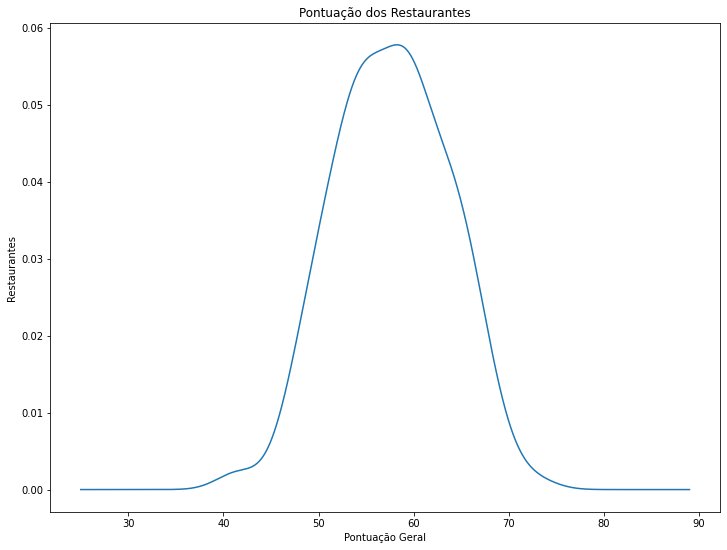

In [ ]:
# Plotando um gráfico com a relação de Score geral por Restaurante

plt.figure(figsize=(12, 9))
data_melhor_score = data['Food'] + data['Decor'] + data['Service']
data_melhor_score.sort_values(ascending=False)
data_melhor_score.plot(kind='kde')
plt.xlabel('Pontuação Geral')
plt.ylabel('Restaurantes')
plt.title('Pontuação dos Restaurantes')
plt.show()

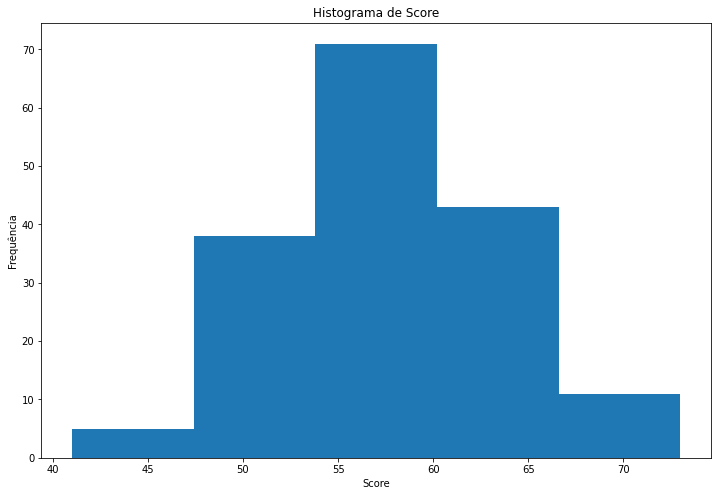

In [ ]:
# Plotando histograma do Score geral 

plt.hist(data2['Score'], bins=5)
plt.xlabel('Score')
plt.ylabel('Frequência')
plt.title('Histograma de Score');

In [ ]:
# CALCULANDO BETA 1 - x=price y=score
 
beta_1 = sum((data2['Price'] - data2['Price'].mean()) * (data2['Score'] - data2['Score'].mean())) /\
        sum((data2['Price'] - data2['Price'].mean())**2)
beta_1

0.49030280892267875

In [ ]:
# CALCULANDO BETA 0 x=price y=score MÉDIA DE y - BETA 1 * MÉDIA DE x

beta_0 = data2['Score'].mean() - beta_1 * data2['Price'].mean()
beta_0

36.750344949985866

In [ ]:
# CALCULANDO OS RESÍDUOS

residuals = data2['Score'] - (beta_0 + beta_1 * data2['Price'])
residuals

Daniella Ristorante    2.166634
Tello's Ristorante     5.559965
Biricchino            -1.420640
Bottino                0.147240
Da Umberto             0.773303
                         ...   
Baci                  -3.949732
Puccini                3.501782
Bella Luna            -0.949732
Métisse                4.618148
Gennaro               -3.420640
Length: 168, dtype: float64

In [ ]:
# MÉDIA DOS RESÍDUOS (PRÓXIMO DE ZERO)

sum(residuals)/2

-3.552713678800501e-15

In [ ]:
# ESTIMANDO PARÂMETROS

X = sm.add_constant(data2['Price'])
y = data2['Score']
X.head()

,const,Price
Daniella Ristorante,1.0,43
Tello's Ristorante,1.0,32
Biricchino,1.0,34
Bottino,1.0,41
Da Umberto,1.0,54


In [ ]:
# AJUSTANDO O MODELO (MÉTODO PARA ENCONTRAR BETA1 E BETA 0)

model_score = sm.OLS(y, X).fit()

In [ ]:
# EM RELAÇÃO AO TESTE DE HIPOTESE, O P-VALOR DA CONST E DO PRICE SÃO MENORES QUE 0.05


print(model_score.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     239.7
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           4.96e-34
Time:                        22:15:27   Log-Likelihood:                -461.81
No. Observations:                 168   AIC:                             927.6
Df Residuals:                     166   BIC:                             933.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.7503      1.384     26.559      0.0

#### $R^2$ - O coeficiente de determinação é 0.59, ou seja, 59% da variabilidade do PREÇO é explicado pela variável Pontuação

In [ ]:
# O erro residual padrão é 3.80.
# Esse valor é uma aproximação de quanto os resíduos tendem a desviar da linha da regressão Erro residual padrão

np.sqrt(model_score.scale)

3.8034483220952886

Significância: Podemos ver que todos os coeficientes são significativos. Ou seja, os dois p-valores são menores que 0.05.  A estatística F para a regressão também é significativa, pois o p-valor de F (Prob (F-statistic):), também é menor que 0.05

Intervalo de confiança : Podemos ver também o intervalo de confiança de 95% dos coeficientes

#### Verificando as premissas

In [ ]:
graph_plotter = graphs.AssumptionGraphs(model_score)

#Usado aqui o arquivo graphs.py fornecido em aula

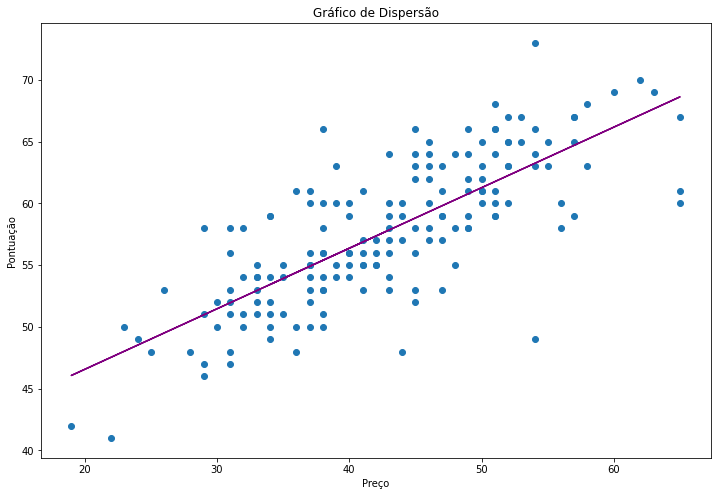

In [ ]:
# DE ACORDO COM O GRÁFICO DE DISPERSÃO, CONSIGO TRAÇAR UMA LINHA RETA
# ENTÃO NÃO FERE A PREMISSÃO DE LINEARIDADE

plt.scatter(data2['Price'], data2['Score'])
plt.xlabel('Preço')
plt.ylabel('Pontuação')
plt.title('Gráfico de Dispersão');
plt.plot(data2['Price'], beta_0 + beta_1 * data2['Price'], color='purple');

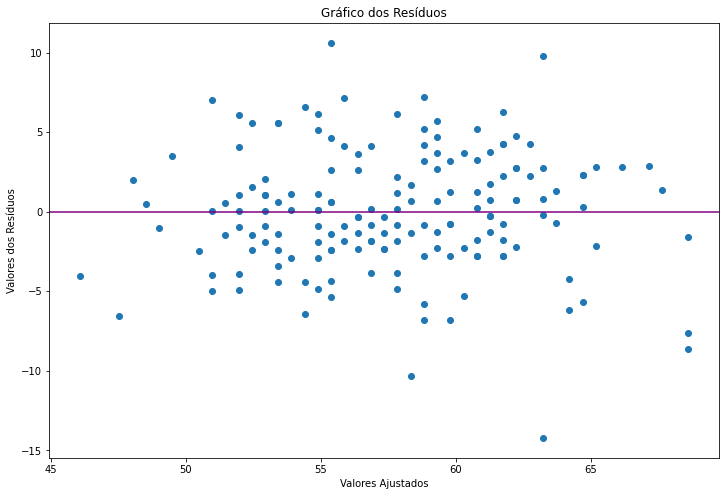

In [ ]:
# Homocedasticidade e independência dos erros - Não fere a premissa

plt.scatter(model_score.fittedvalues, model_score.resid)
plt.title('Gráfico dos Resíduos')
plt.xlabel('Valores Ajustados')
plt.ylabel('Valores dos Resíduos')
plt.axhline(color='purple');

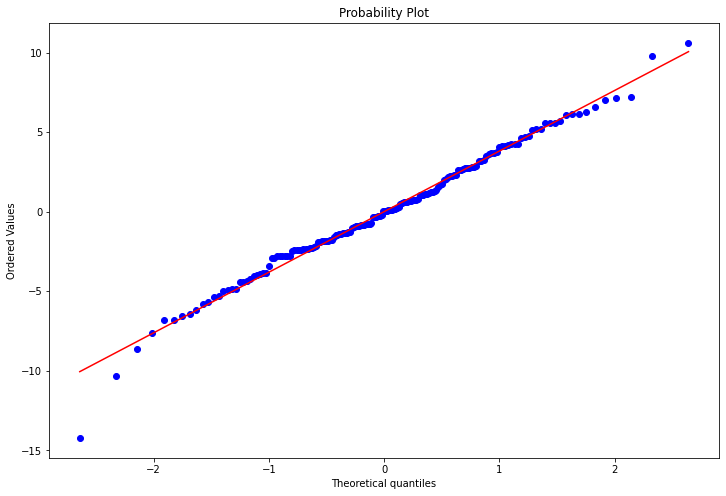

In [ ]:
# Normalidade

# Pelo gráfico vemos que fere pouco a Normalidade nas extremidades 

graph_plotter.plot_qq()


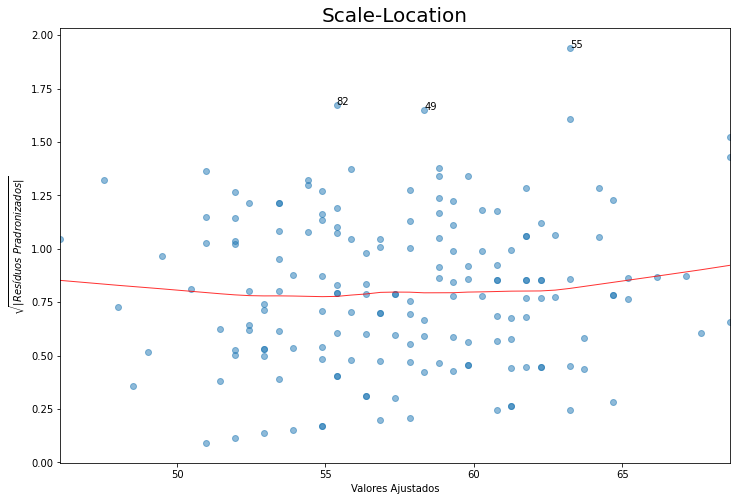

In [ ]:
# GRÁFICO SCALE LOCATION, LINHA QUASE RETA HORIZONTALMENTE
graph_plotter.plot_scale_location()

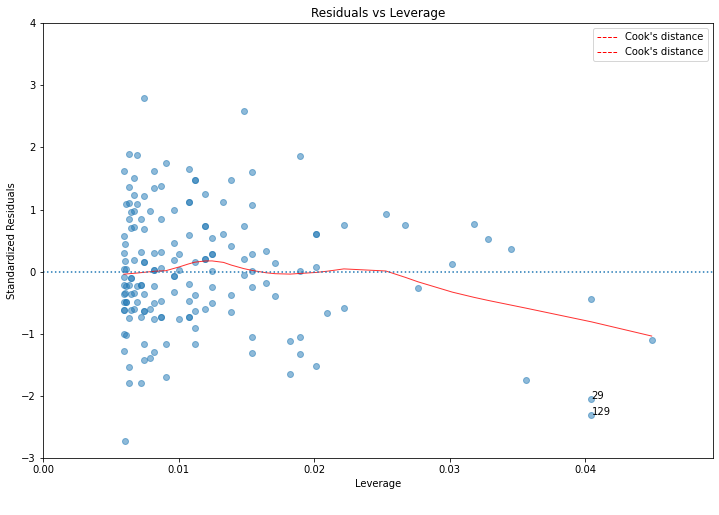

In [ ]:
# GRÁFICO DE INFLUÊNCIA. NÃO VEMOS PONTOS ALÉM DA DISTÂNCIA DE COOK. SEM OUTLIERS. 

graph_plotter.plot_influence()

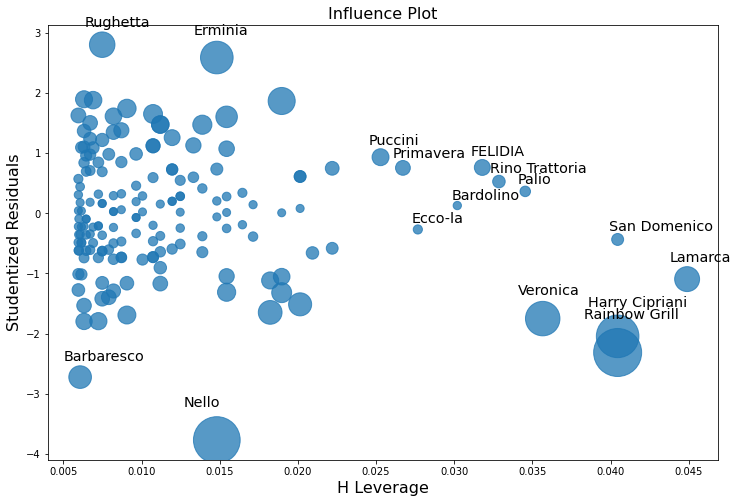

In [ ]:
# OUTRO GRÁFICO DE INFLUÊNCIA PARA VERIFICARMOS MELHOR

model_score.get_influence().plot_influence();

MODELO B - LEVANDO EM CONSIDERAÇÃO A BASE REDUZIDA + A NOVA COLUNA PONTUAÇÃO(SCORE)


In [ ]:
data1

,Price,Food,Decor,Service,Location,Score
Daniella Ristorante,43,22,18,20,1,60
Tello's Ristorante,32,20,19,19,1,58
Biricchino,34,21,13,18,1,52
Bottino,41,20,20,17,1,57
Da Umberto,54,24,19,21,1,64
...,...,...,...,...,...,...
Baci,31,17,15,16,1,48
Puccini,26,20,16,17,1,53
Bella Luna,31,18,16,17,1,51
Métisse,38,22,17,21,1,60


In [ ]:
# CRIANDO UM NOVO MODELO COM TODAS AS VARIÁVEIS ORIGINAIS + SCORE
# X = VARIÁVEIS PREDITORAS E Y = VARIÁVEL RESPOSTA

X = sm.add_constant(data1.drop(['Price'],axis=1))
y = data1['Price']
X.head()

,const,Food,Decor,Service,Location,Score
Daniella Ristorante,1.0,22,18,20,1,60
Tello's Ristorante,1.0,20,19,19,1,58
Biricchino,1.0,21,13,18,1,52
Bottino,1.0,20,20,17,1,57
Da Umberto,1.0,24,19,21,1,64


In [ ]:
model3 = sm.OLS(y, X).fit()


In [ ]:
print(model3.summary())

# VERIFICAMOS QUE:
# P-VALOR, COEFICIENTE DE DETERMINAÇÃO E AJUSTADO 9SIGNIFICATIVOS), SÃO OS MESMOS DO MODELO 2 REDUZIDO;
# É UM MODELO RELEVANTE

# OBSERVAMOS UMA MUDANÇA NO P-VALOR DA COMIDA, ESTÁ UM POUCO ACIMA DE 0.5

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     68.76
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           5.35e-34
Time:                        22:20:20   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1069.
Df Residuals:                     163   BIC:                             1084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.9557      4.858     -4.520      0.0

# VERIFICANDO AS PREMISSAS

In [ ]:
graph_plotter = graphs.AssumptionGraphs(model3)

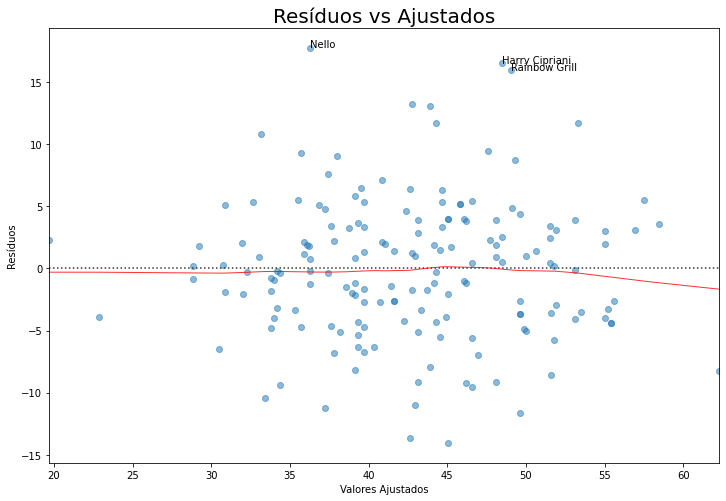

In [ ]:
# O GRÁFICO DOS RESÍDUOS X VALOR AJUSTADO É MUITO SIMILAR TAMBÉM# AO MODELO 2

graph_plotter.plot_residual_fitted_values(y)

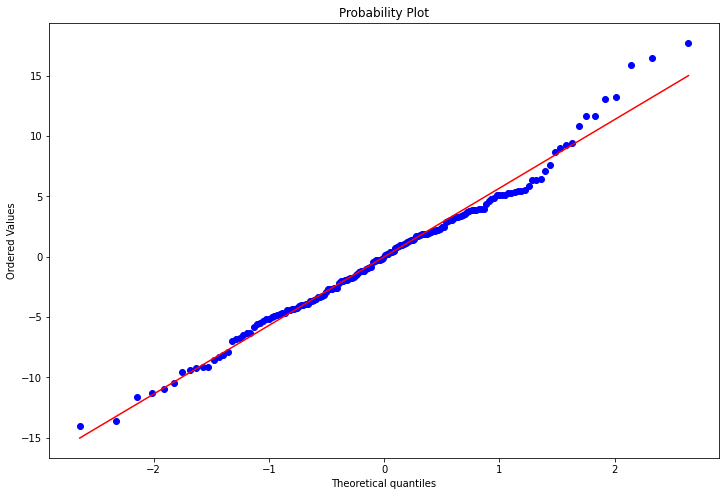

In [ ]:
# TESTANDO A NORMALIDADE - VERIFICAMOS QUE SAI UM POUCO DA LINHA 

graph_plotter.plot_qq()

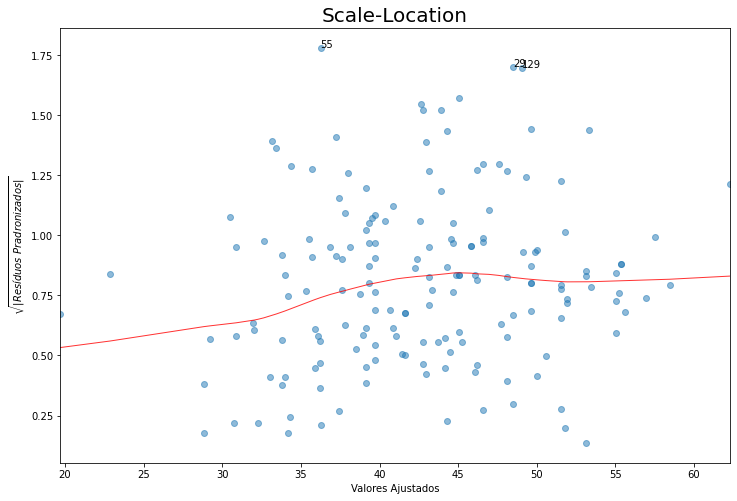

In [ ]:
# GRÁFICO SCALE LOCATION - NÃO VERIFICAMOS UMA MUDANÇA SIGNIFICATIVA

graph_plotter.plot_scale_location()

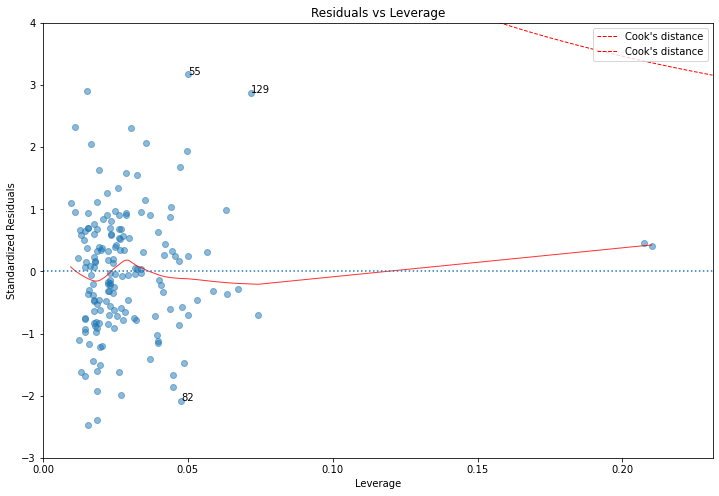

In [ ]:
# GRÁFICO DE INFLUÊNCIA DESSE MODELO

graph_plotter.plot_influence()

Comparando o modelo com Score com o modelo anterior (2 - Reduzido)


In [ ]:
anova_results = anova_lm(model3, model2)
anova_results

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,163.0,5366.521715,0.0,NaN,NaN,NaN
1,164.0,5366.523275,-1.0,-0.00156,0.000048,NaN


In [ ]:
# COMPARANDO VALORES DE AIC E BIC

pd.DataFrame({'Model': ['Full', 'With Score'], 'AIC': [model2.aic, model3.aic],
              'BIC': [model2.bic, model3.bic]})

,Model,AIC,BIC
0,Full,1066.710570,1079.206426
1,With Score,1068.710521,1084.330341


### A CONCLUSÃO DESSE MODELO-TESTE É DE QUE ACRESCENTAR UMA NOVA VARIÁVEL COM A PONTUAÇÃO GERAL, BASEADA NO SOMATÓRIO DAS NOTAS DE COMIDA, DECORAÇÃO E SERVIÇO, NÃO INFLUENCIA NO RESULTADO FINAL DO MODELO, APRESENTANDO OS MESMOS VALORES PARA AMBOS.

e) Qual o melhor modelo? Comparar os modelos construídos com pelo menos três métricas, justificando a escolha do melhor modelo. (1 ponto)

### RESPOSTA

O MELHOR MODELO É O 2, NO QUAL APRESENTAVA AS COLUNAS 'FOOD, DECOR E LOCATION'. SEM A INCLUSÃO DA SCORE. COMPARAÇÃO TAMBÉM REALIZADA ACIMA COM CÓDIGO COMENTADO.

